In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from header import *
import seaborn as sns

In [2]:
comps = pd.read_pickle("scratch/xgb2_sw_dataset.pkl")

In [3]:
comps.target.hist()

<AxesSubplot:>

In [22]:
dcs = comps[comps.target==3]

In [23]:
len(dcs)

565563

In [24]:
dcs.B_plus_MCORR

648740      6294.968119
648741      4251.013752
648742      4548.024286
648743      4817.793616
648744      4429.248664
               ...     
1214298     4825.551896
1214299     4442.207031
1214300    10153.207203
1214301     6182.978703
1214302     7694.445439
Name: B_plus_MCORR, Length: 565563, dtype: float64

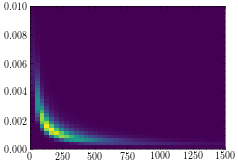

In [28]:
_ = plt.hist2d(
    x = dcs.B_plus_MCORRERR, y = dcs.B_plus_FIT_LTIME,
    range=[[0, 1500],[0, 0.01]],
    bins=40
)


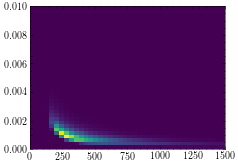

In [29]:
_ = plt.hist2d(
    x = dcs.query("XGB_antiVcb>0.4").B_plus_MCORRERR, y = dcs.query("XGB_antiVcb>0.4").B_plus_FIT_LTIME,
    range=[[0, 1500],[0, 0.01]],
    bins=40
)

In [30]:
sig = comps[comps.target==1]

In [32]:
len(sig.query("XGB_antiVcb>0.38")) / len(sig)

0.8968685012820772

In [11]:
_sel = "B_plus_M>3500 and B_plus_M<6280 and \
XGB_antiComb>0.7 and \
XGB_antiVcb>0.0 and B_plus_FIT_LTIME<0.0020"

In [8]:
len(comps[comps.target==0])

18783215

In [12]:
len(comps[comps.target==0].query(_sel))

7213432

In [10]:
len(cf)

0

In [21]:
sig_sel = "B_plus_M>0 and B_plus_M<6280 and \
XGB_antiComb>0.7 and \
XGB_antiVcb>0.38 and B_plus_FIT_LTIME<0.0020"
sig = comps[comps.target==1].query(sig_sel)

<AxesSubplot:>

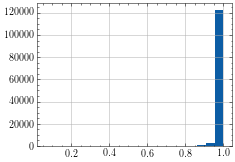

In [22]:
sig.Mu_plus_ProbNNmu.hist(bins=20)

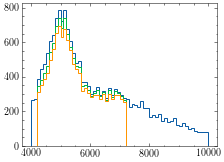

In [24]:
fig, ax = plt.subplots()

_ = ax.hist(dcs.B_plus_MCORR, weights=dcs.sw, histtype="step", 
            bins=30, range=[400, 10_000])
_ = ax.hist(dcs.query("Mu_plus_ProbNNmu>0.8").B_plus_MCORR, 
            weights=dcs.query("Mu_plus_ProbNNmu>0.8").sw, 
            histtype="step", bins=30, range=[4200, 7200])
_ = ax.hist(dcs.query("Mu_plus_ProbNNmu>0.95").B_plus_MCORR, 
            weights=dcs.query("Mu_plus_ProbNNmu>0.95").sw, 
            histtype="step", bins=30, range=[4200, 7200])

In [4]:
misid = comps[comps.target==4]

In [9]:
ws = comps[comps.target==2]
_ = plt.hist(
        ws.query("B_plus_M>3500")["B_plus_MCORR"],
        weights = ws.query("B_plus_M>3500")["sw"],
        range = [4200, 7200], bins=20, histtype="step",
        label = r"WS"
    )

In [11]:
len(comps[comps.target==4])

127179

In [16]:
misid = comps[comps.target==4]

In [39]:
_ = plt.hist(
    misid.sw,
)

/home/blaised/miniconda3/envs/ANAenv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/blaised/miniconda3/envs/ANAenv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

In [11]:
misid.fakemuon_w

35602361    50.0
35602362    50.0
35602363    50.0
35602364    50.0
35602365    50.0
            ... 
35750511    50.0
35750512    50.0
35750513    50.0
35750514    50.0
35750515    50.0
Name: fakemuon_w, Length: 128585, dtype: float64

In [12]:
antiVcb_sel = "B_plus_M>0 and B_plus_M<6280 and \
xgb_antiVcb>0.38 and B_plus_FIT_LTIME<0.0020"

misid = comps[comps.target==4]
_ = plt.hist(
    misid.query(antiVcb_sel)["B_plus_MCORR"],
    weights = misid.query(antiVcb_sel)["sw"]*misid.query(antiVcb_sel)["misid_w"],
    range = [4200, 7200], bins=30,density=True
)

misid = comps[comps.target==4]
_ = plt.hist(
    misid.query(antiVcb_sel)["B_plus_MCORR"],
    weights = misid.query(antiVcb_sel)["sw"],
    range = [4200, 7200], bins=30,
    histtype="step", density=True
)

KeyError: 'misid_w'

66          0.754353
117         0.840849
136         0.714330
167         0.733892
179         0.731461
              ...   
35750511    0.959920
35750512    0.990422
35750513    0.992363
35750514    0.963875
35750515    0.951036
Name: xgb, Length: 1013659, dtype: float32

In [40]:
cf = data[data.target==0]
_ = plt.hist(
    cf.query(antiVcb_sel)["B_plus_MCORR"],
    range = [4200, 7200], bins=30
)

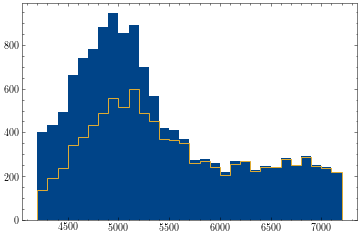

In [57]:
with plt.style.context('high-contrast'):
    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and xgb_AntiVcb>0. and B_plus_FIT_LTIME<0.0020"
    cf = data[data.target==3]
    _ = plt.hist(
        cf.query(antiVcb_sel)["B_plus_MCORR"],
        weights = cf.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=30
    )

    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and xgb_AntiVcb>0.38 and B_plus_FIT_LTIME<0.0020"
    cf = data[data.target==3]
    _ = plt.hist(
        cf.query(antiVcb_sel)["B_plus_MCORR"],
        weights = cf.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=30, histtype="step"
    )
    

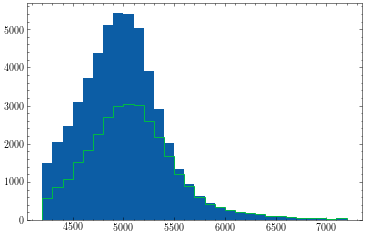

In [44]:
antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and xgb_AntiVcb>0. and B_plus_FIT_LTIME<0.0020"
cf = data[data.target==0]
_ = plt.hist(
    cf.query(antiVcb_sel)["B_plus_MCORR"],
    range = [4200, 7200], bins=30
)

antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and xgb_AntiVcb>0.38 and B_plus_FIT_LTIME<0.0020"
cf = data[data.target==0]
_ = plt.hist(
    cf.query(antiVcb_sel)["B_plus_MCORR"],
    range = [4200, 7200], bins=30, histtype="step"
)

In [10]:
comps.keys()

Index(['CosXY_Mu_plus_D0', 'CosXYZ_Mu_plus_Pi_1', 'CosXYZ_Mu_plus_K_minus',
       'B_plus_ETA', 'B_plus_FIT_LTIME', 'B_plus_ENDVERTEX_CHI2',
       'B_plus_OWNPV_CHI2', 'B_plus_IPCHI2_OWNPV', 'B_plus_FDCHI2_OWNPV',
       'B_plus_PT',
       ...
       'Mu_plus_ProbNNpi', 'Mu_plus_LK_ETA', 'nCandidate', 'totCandidates',
       'runNumber', 'eventNumber', 'nTracks', '__index__', 'rel_mcorrerr',
       'xgb_antiVcb'],
      dtype='object', length=146)

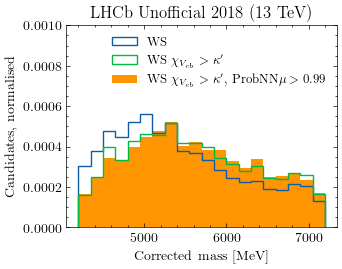

In [4]:
with plt.style.context('science'):
    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and xgb_antiVcb>0. and B_plus_FIT_LTIME<0.0020"
    ws = comps[comps.target==2]
    _ = plt.hist(
        ws.query(antiVcb_sel)["B_plus_MCORR"],
        #weights = ws.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=20, density=True, histtype="step",
        label = r"WS"
    )

    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and\
        xgb_antiVcb>0.378 and B_plus_FIT_LTIME<0.0020"
    ws = comps[comps.target==2]
    _ = plt.hist(
        ws.query(antiVcb_sel)["B_plus_MCORR"],
        #weights = ws.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=20, density=True, histtype="step",
        label = r"WS $\chi_{V_{cb}}>\kappa'$"
    )
    
    
    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280\
    and xgb_antiVcb>0.378 and B_plus_FIT_LTIME<0.0020\
    and Mu_plus_ProbNNmu>0.99"
    ws = comps[comps.target==2]
    _ = plt.hist(
        ws.query(antiVcb_sel)["B_plus_MCORR"],
        #weights = ws.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=20, density=True,
        label = r"WS $\chi_{V_{cb}}>\kappa'$, ProbNN$\mu>0.99$"
    )

    plt.ylim(top=0.001)
    plt.legend(fontsize=9)
    plt.xlabel("Corrected mass [MeV]")
    plt.ylabel("Candidates, normalised")
    plt.title("LHCb Unofficial 2018 (13 TeV)")
    plt.savefig("plots/tmp/WS_misID.png")
    plt.savefig("plots/tmp/WS_misID.pdf")

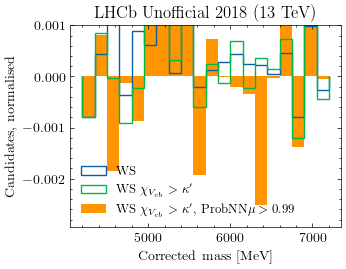

In [57]:
with plt.style.context('science'):
    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and xgb_AntiVcb>0. and B_plus_FIT_LTIME<0.0020"
    ws = comps[comps.target==2]
    _ = plt.hist(
        ws.query(antiVcb_sel)["B_plus_MCORR"],
        weights = ws.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=20, density=True, histtype="step",
        label = r"WS"
    )

    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280 and\
        xgb_AntiVcb>0.378 and B_plus_FIT_LTIME<0.0020"
    ws = comps[comps.target==2]
    _ = plt.hist(
        ws.query(antiVcb_sel)["B_plus_MCORR"],
        weights = ws.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=20, density=True, histtype="step",
        label = r"WS $\chi_{V_{cb}}>\kappa'$"
    )
    
    
    antiVcb_sel = "B_plus_M>3500 and B_plus_M<6280\
    and xgb_AntiVcb>0.378 and B_plus_FIT_LTIME<0.0020\
    and Mu_plus_ProbNNmu>0.99"
    ws = comps[comps.target==2]
    _ = plt.hist(
        ws.query(antiVcb_sel)["B_plus_MCORR"],
        weights = ws.query(antiVcb_sel)["sw"],
        range = [4200, 7200], bins=20, density=True,
        label = r"WS $\chi_{V_{cb}}>\kappa'$, ProbNN$\mu>0.99$"
    )

    plt.ylim(top=0.001)
    plt.legend(fontsize=9)
    plt.xlabel("Corrected mass [MeV]")
    plt.ylabel("Candidates, normalised")
    plt.title("LHCb Unofficial 2018 (13 TeV)")
    plt.savefig("plots/tmp/sW_WS_misID.png")
    plt.savefig("plots/tmp/sW_WS_misID.pdf")

In [38]:
data.target.hist()

NameError: name 'data' is not defined

In [6]:
plt_conf = {
    "range" : [3000, 10000],
    "bins"  : 30,
    "density" : True,
    "alpha" : 0.75,
}